In [1]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정 
np.random.seed(42)

num_samples = 100


data = {
    "income": np.random.normal(loc=4000, scale=1000, size=num_samples),
    "expenses": np.random.normal(loc=2000, scale=500, size=num_samples),
}

df = pd.DataFrame(data)

# 이상치 추가
num_outliers = 7

# income 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "income"] = (
    df["income"].mean() + 5 * df["income"].std()
)
# expenses 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "expenses"] = (
    df["expenses"].mean() + 5 * df["expenses"].std()
)

df.loc[55] = [0, 0]
df.loc[44] = [10000, 10000]

print(df.head())

        income     expenses
0  4496.714153  1292.314629
1  8436.995623  1789.677339
2  4647.688538  1828.642742
3  5523.029856  1598.861365
4  3765.846625  1919.357144


### (1) 이상치 제거하기

1. `expenses`에 대한 상자그림(box plot)을 출력하세요.
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/76665609-8461-4975-997e-87b99cb239e2/Untitled.png)

<Axes: >

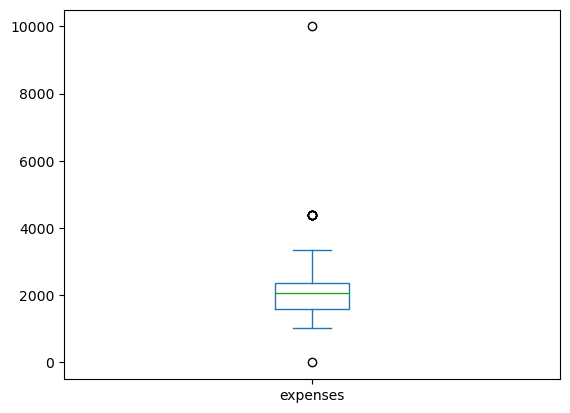

In [2]:
df['expenses'].plot.box()

2. `expenses`에 대해 사분위수를 활용한 이상치를 탐색하고 출력하세요.
    
    ```bash
    24     4395.324709
    25     4395.324709
    38     4395.324709
    41     4395.324709
    44    10000.000000
    49     4395.324709
    55        0.000000
    92     4395.324709
    98     4395.324709
    Name: expenses, dtype: float64
    ```

In [5]:
column_e = df['expenses']
q1 = column_e.quantile(0.25)
q3 = column_e.quantile(0.75)
IQR = q3-q1
l_bound = q1 - IQR * 1.5
u_bound = q3 + IQR * 1.5
lower_bound_filter = column_e < l_bound 
upper_bound_filter = column_e > u_bound  

# 이상치 추출
outliers = column_e[lower_bound_filter | upper_bound_filter]

print(outliers)

24     4395.324709
25     4395.324709
38     4395.324709
41     4395.324709
44    10000.000000
49     4395.324709
55        0.000000
92     4395.324709
98     4395.324709
Name: expenses, dtype: float64


3. 데이터 필터링을 활용해서 이상치를 제거하고, 결과를 `df_cleaned` 변수에 저장하고 expenses 데이터를 출력하세요.
    
    ```bash
    0     1292.314629
    1     1789.677339
    2     1828.642742
    3     1598.861365
    4     1919.357144
             ...     
    94    2086.590463
    95    2192.658690
    96    1558.071282
    97    2076.862553
    99    1428.514851
    Name: expenses, Length: 91, dtype: float64
    ```

In [31]:
df_cleaned = df.drop(outliers.index)
df_cleaned

,income,expenses
0,4496.714153,1292.314629
1,8436.995623,1789.677339
2,4647.688538,1828.642742
3,5523.029856,1598.861365
4,3765.846625,1919.357144
...,...,...
94,3607.891847,2086.590463
95,2536.485052,2192.658690
96,4296.120277,1558.071282
97,4261.055272,2076.862553


In [32]:
lower_bound_filter = column_e >= l_bound 
upper_bound_filter = column_e <= u_bound  

# 이상치 추출
non_outliers = column_e[lower_bound_filter & upper_bound_filter]
non_outliers

0     1292.314629
1     1789.677339
2     1828.642742
3     1598.861365
4     1919.357144
         ...     
94    2086.590463
95    2192.658690
96    1558.071282
97    2076.862553
99    1428.514851
Name: expenses, Length: 91, dtype: float64

4.  변수 `df_cleaned` 의 `expenses`에 대한 상자그림(box plot)을 출력하세요.
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/93de7c2a-143f-466c-8003-a1e3696b4cbe/Untitled.png)

<Axes: >

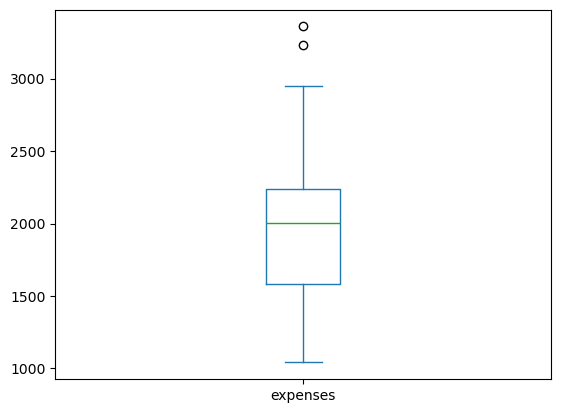

In [34]:
df_cleaned['expenses'].plot.box()

In [35]:
### (2) 이상치 수정하기

import pandas as pd
import numpy as np

# 랜덤 모듈 사용을 위한 시드 설정
np.random.seed(0)

# 학생 수와 데이터 수 설정
num_students = 1000

# 데이터프레임 생성
df = pd.DataFrame(
    {
        "ID": np.arange(1, num_students + 1),
        "Name": [f"학생{i}" for i in range(1, num_students + 1)],
        "grade": np.round(np.random.uniform(1.0, 4.5, size=num_students), 2),
    }
)

# 일부 이상치 추가
num_outliers = 50

# grade 열에 이상치 추가
outlier_indices_gpa = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices_gpa, "grade"] = np.round(
    np.random.uniform(4.5, 10.0, size=num_outliers), 2
)

2. `grade` 에 대한 상자그림을 출력하세요.
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/51c577d1-b9ce-47e8-bc0b-69d24990d694/Untitled.png)

<Axes: >

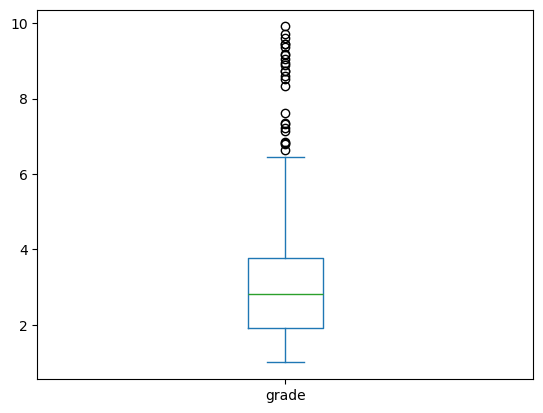

In [36]:
df['grade'].plot.box()

3. `grade`에 대해 사분위수를 활용한 이상치를 탐색하고 출력하세요.
    
    ```bash
    24     9.17
    57     8.94
    71     9.70
    86     6.79
    98     9.37
    124    6.81
    180    8.89
    352    7.34
    385    6.64
    396    7.33
    403    8.72
    495    9.04
    532    8.33
    545    8.51
    548    9.15
    575    7.21
    579    9.45
    628    7.15
    651    9.45
    655    7.61
    663    9.60
    759    8.73
    916    6.85
    936    8.59
    943    9.91
    Name: grade, dtype: float64
    ```

In [65]:
column_g = df['grade']
q1 = column_g.quantile(0.25)
q3 = column_g.quantile(0.75)
IQR = q3-q1
l_bound = q1 - IQR * 1.5
u_bound = q3 + IQR * 1.5
lower_bound_filter = column_g < l_bound 
upper_bound_filter = column_g > u_bound  

# 이상치 추출
outliers = column_g[lower_bound_filter | upper_bound_filter]

print(l_bound,u_bound)

-0.6975000000000002 6.282500000000001


4. `grade` 에 대한 이상치를 평균값으로 수정하고, 상자그림을 출력하세요.
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/18273a13-4427-497b-90b4-5df2a7c303e1/Untitled.png)

In [72]:
max(df['grade'])

6.27

<Axes: >

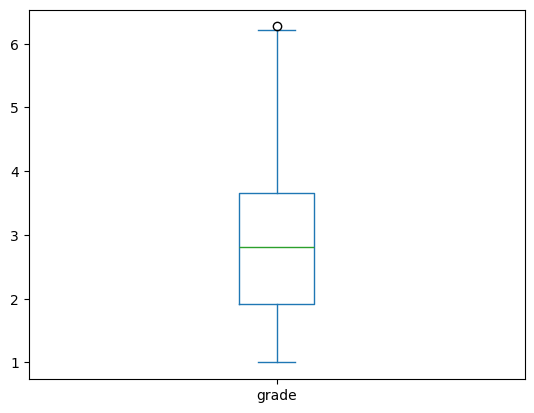

In [73]:
df.loc[outliers.index,'grade']=df['grade'].mean()
df['grade'].plot.box()

5. `garde` 데이터 중 4.5가 넘는 데이터를 출력하세요.
    
    ```bash
          ID   Name  grade
    9     10   학생10   4.68
    69    70   학생70   5.42
    132  133  학생133   4.64
    183  184  학생184   5.58
    248  249  학생249   6.27
    306  307  학생307   5.70
    379  380  학생380   5.10
    384  385  학생385   5.02
    402  403  학생403   5.14
    439  440  학생440   6.19
    488  489  학생489   6.45
    547  548  학생548   5.62
    559  560  학생560   5.35
    568  569  학생569   5.45
    616  617  학생617   5.14
    704  705  학생705   4.52
    732  733  학생733   6.21
    771  772  학생772   5.77
    830  831  학생831   5.90
    862  863  학생863   5.10
    899  900  학생900   5.64
    906  907  학생907   6.07
    913  914  학생914   6.12
    962  963  학생963   5.29
    982  983  학생983   5.40
    ```

In [74]:
df.loc[df['grade']>4.5,:]

,ID,Name,grade
9,10,학생10,4.68
69,70,학생70,5.42
132,133,학생133,4.64
183,184,학생184,5.58
248,249,학생249,6.27
306,307,학생307,5.70
379,380,학생380,5.10
384,385,학생385,5.02
402,403,학생403,5.14
439,440,학생440,6.19
